<a href="https://colab.research.google.com/github/OlegLaiok/Projects/blob/master/viz_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [236]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv")
df.to_excel("output.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head

<bound method NDFrame.head of                                                   Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                    11/22/63: A Novel  ...      Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                               1984 (Signet Classics)  ...      Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
..                                                 ...  ...          ...
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...      Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[550 rows x 7 columns]>

In [8]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [9]:
cols = list(df.columns)
cols

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [10]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols} #проверили есть ли пустые значения в датафрейме
df_na

{'Author': 0,
 'Genre': 0,
 'Name': 0,
 'Price': 0,
 'Reviews': 0,
 'User Rating': 0,
 'Year': 0}

Для начала посмотрим, какую информацию мы можем узнать из текстовых данных. Для удобства сформируем словари где укажем частоту встречи каждой книги, автора и жанра.

In [20]:
nom_cols_data = [{name: df[col].to_list().count(name) for name in df[col]. unique()} for col in cols if df[col].dtype=="object"]
nom_cols_data

[{'10-Day Green Smoothie Cleanse': 1,
  '11/22/63: A Novel': 1,
  '12 Rules for Life: An Antidote to Chaos': 1,
  '1984 (Signet Classics)': 1,
  '5,000 Awesome Facts (About Everything!) (National Geographic Kids)': 1,
  'A Dance with Dragons (A Song of Ice and Fire)': 1,
  'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons': 1,
  'A Gentleman in Moscow: A Novel': 1,
  'A Higher Loyalty: Truth, Lies, and Leadership': 1,
  'A Man Called Ove: A Novel': 2,
  "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror": 1,
  'A Stolen Life: A Memoir': 1,
  'A Wrinkle in Time (Time Quintet)': 1,
  'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment': 1,
  'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns': 1,
  'Adult Coloring Book: Stress Relieving Animal Designs': 1,
  'Adult Coloring 

Выберем те книги которые встречались более трех раз.

In [203]:
dict_names = nom_cols_data[0]
name_graph=[]
freq_graph=[]
list_names = list(dict.keys(dict_names))
for i in list_names:
    if dict_names[i] >= 3:
        name_graph.append(i)
        freq_graph.append(int(dict_names[i]))

Теперь составим график самых встречаемых книг в топе.

In [14]:
import matplotlib.pyplot as plt

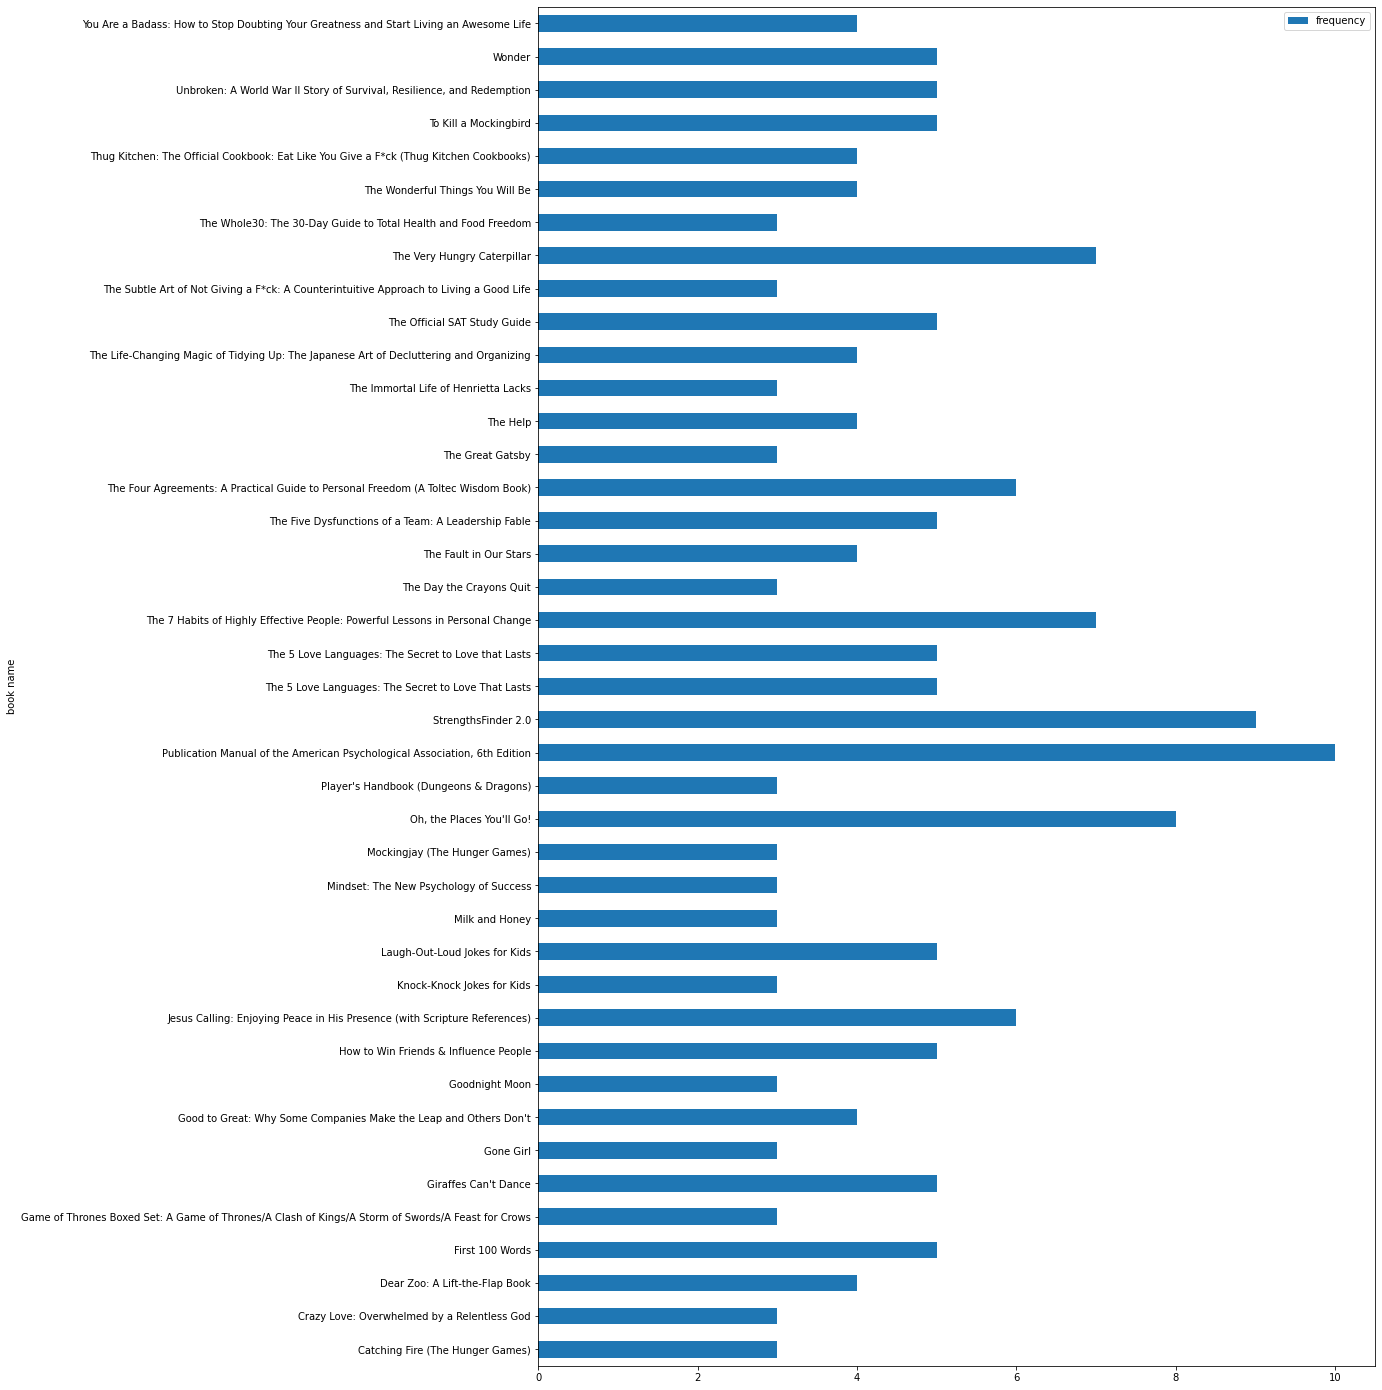

In [204]:
names_freq_graph = pd.DataFrame({"book name": name_graph, "frequency": freq_graph})
names_freq_graph.frequency = pd.to_numeric(names_freq_graph.frequency)
names_freq_graph.plot.barh(x="book name", y="frequency", figsize=(15,25))

Теперь посмотрим, какие авторы чаще всего встречались в топе.

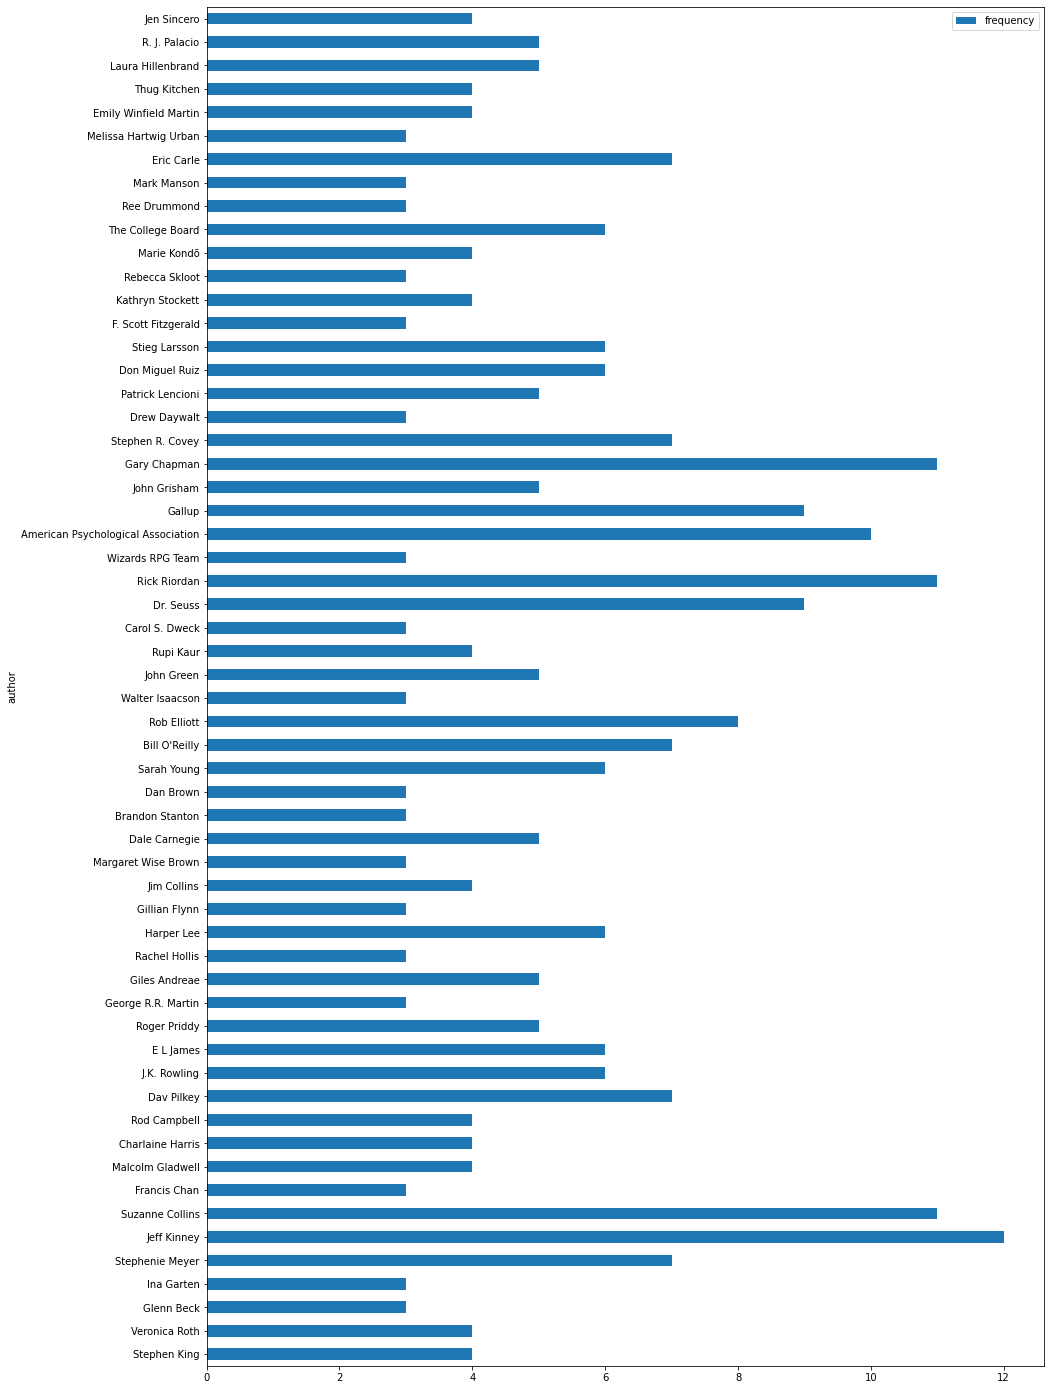

In [201]:
dict_author = nom_cols_data[1]
author_graph=[]
freq_graph=[]
list_authors = list(dict.keys(dict_author))
for i in list_authors:
    if dict_author[i] >= 3:
        author_graph.append(i)
        freq_graph.append(int(dict_author[i]))
author_freq_graph = pd.DataFrame({"author": author_graph, "frequency": freq_graph})
author_freq_graph.frequency = pd.to_numeric(author_freq_graph.frequency)
author_freq_graph.plot.barh(x="author", y="frequency", figsize=(15,25)) #авторы которые чаще всего стречались в топе


Проанализируем соотношении fiction к non fiction в топе

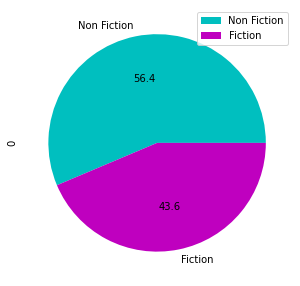

In [33]:
pie = pd.DataFrame.from_dict(nom_cols_data[2],orient='index')
pie.plot.pie(colors=["c", "m"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5),
             subplots = "True");

Можем заметить, что распределение довольно равное, хотя нехудожественной литературы больше. Однако, интереснее проанализировать числовые данные. Попробуем проанализировать рейтинги книг. Для начала посчитаем для этого столбца некоторые меры центральной тенденции и разброса:

In [109]:
rating_stat = {"min": df["User Rating"].min(), 
            "max": df["User Rating"].max(), 
            "mean": df["User Rating"].mean(),
            "median": df["User Rating"].median(),
            "mode": df["User Rating"].mode().to_list(),
            "var": df["User Rating"].var(ddof=0),
            "std": df["User Rating"].std(ddof=0),
            "range": df["User Rating"].max() - df["User Rating"].min(),
            "interquartile_range": df["User Rating"].quantile(0.75) - df["User Rating"].quantile(0.25),
            "skew": df["User Rating"].skew()
            }
rating_stat

{'interquartile_range': 0.2999999999999998,
 'max': 4.9,
 'mean': 4.618363636363641,
 'median': 4.7,
 'min': 3.3,
 'mode': [4.8],
 'range': 1.6000000000000005,
 'skew': -1.502125498034903,
 'std': 0.2267739253599061,
 'var': 0.05142641322314026}

In [ ]:
Построим график распределения количества книг по каждому рейтингу

{3.9: 3, 4.8: 127, 4.5: 60, 4.7: 108, 4.6: 105, 4.4: 38, 4.3: 25, 4.2: 8, 4.9: 52, 3.8: 2, 4.0: 14, 3.6: 1, 3.3: 1, 4.1: 6}


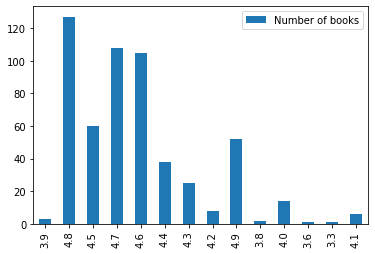

In [106]:
rating_data = {rating: df["User Rating"].to_list().count(rating) for rating in set(df["User Rating"])}
print(rating_data)
df_1 = pd.DataFrame.from_dict(data = rating_data, orient = 'index', columns=['Number of books'])
df_1.plot(kind='bar')

Заметим что рейтинг 4.8 показывает максимум, по общему числу книг. Однако проверим как этот параметр меняется для топа книг каждого конкретного года. Создадим новый датафрейм где будет информация о каждом рейтинге в каждом году и о числе книг в этом году попавших в этот рейтинг

In [136]:
years = df['Year'].to_list()
rating = df['User Rating'].to_list()
ratings =[]
for i in range(0,550):
  ratings.append([years[i], rating[i]])
ratings_1 = []
for i in ratings:
  if i not in ratings_1:
    ratings_1.append([i, ratings.count(i)])
years = []
for i in ratings_1:
  years.append(i[0][0])
ratings = []
for i in ratings_1:
  ratings.append(i[0][1])
number = []
for i in ratings_1:
  number.append(i[1])
number_rate = {'Years':years, 'User Rating': ratings, "Number of books":number}
df_rating = pd.DataFrame.from_dict(number_rate)
df_rating = df_rating.drop_duplicates()
df_rating = df_rating.sort_values(by = ['Years', 'User Rating'], ascending=False)
df_rating

,Years,User Rating,Number of books
41,2019,4.9,11
4,2019,4.8,21
98,2019,4.7,6
74,2019,4.6,6
397,2019,4.5,3
...,...,...,...
91,2009,4.5,5
388,2009,4.4,3
92,2009,4.3,3
254,2009,4.2,2


Для сравнения того как меняется средний рейтинг по годам, возьмем данные за первый и последний год.

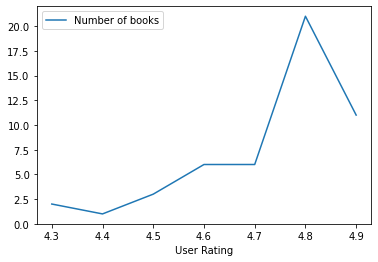

In [149]:
df_2019 = df_rating[df_rating['Years'] == 2019]
df_2019.plot(x='User Rating', y='Number of books')

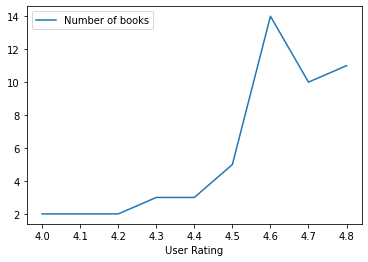

In [150]:
df_2019 = df_rating[df_rating['Years'] == 2009]
df_2019.plot(x='User Rating', y='Number of books')

Данные графики не представляют особой репрезентативности для общего изменения среднего рейтинга по годам, поэтому объеденим графики распределения для каждого года в один

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38820dcd0>],
      dtype=object)

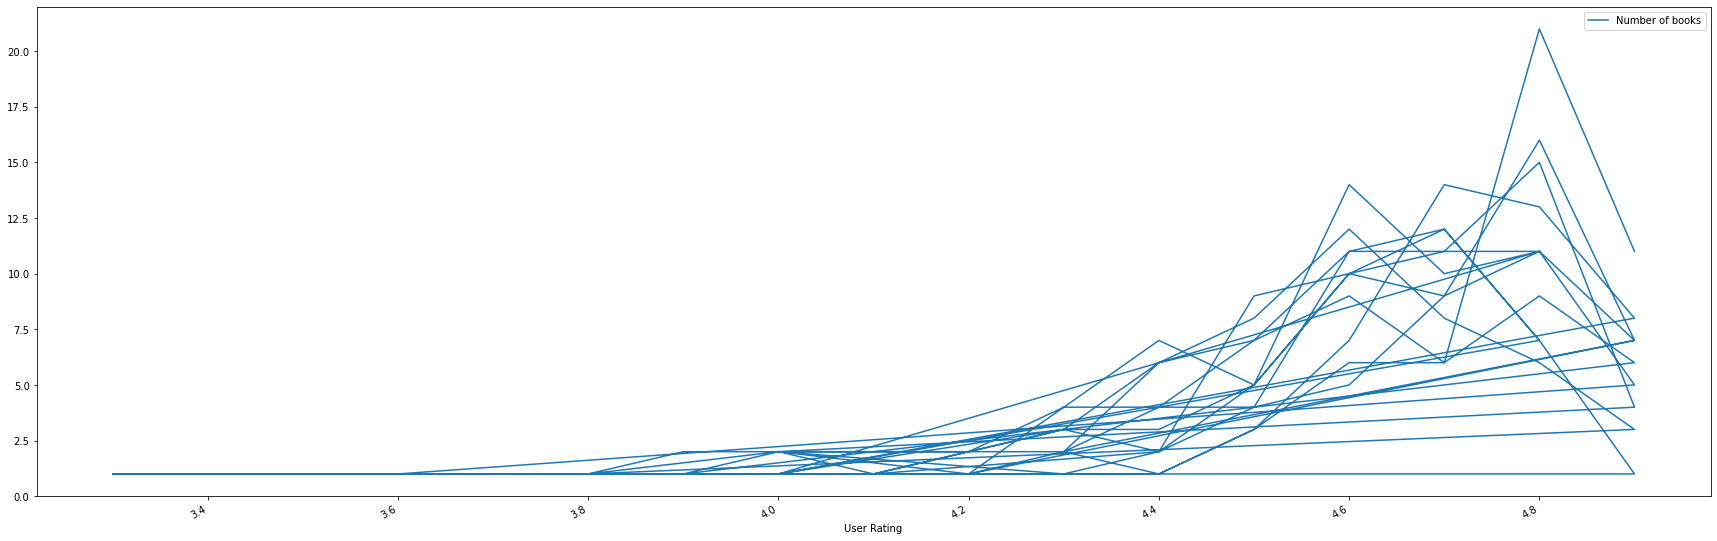

In [200]:
df_rating.plot(x='User Rating', y='Number of books', subplots = True,figsize=(30,10))

Здесь уже можно проследить тенденцию, однако график все еще сложен для понимания. Построим столбчатую диаграмму для каждого года.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc387fe1110>],
      dtype=object)

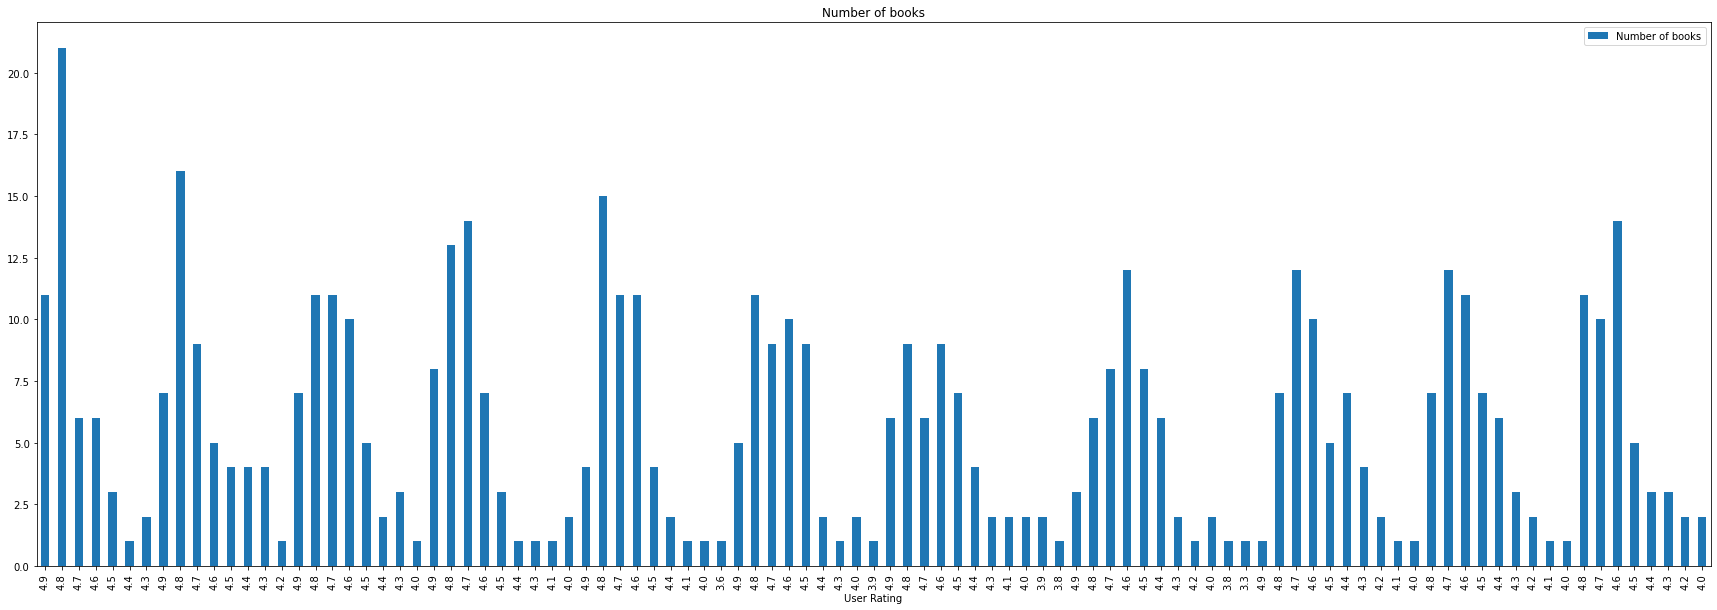

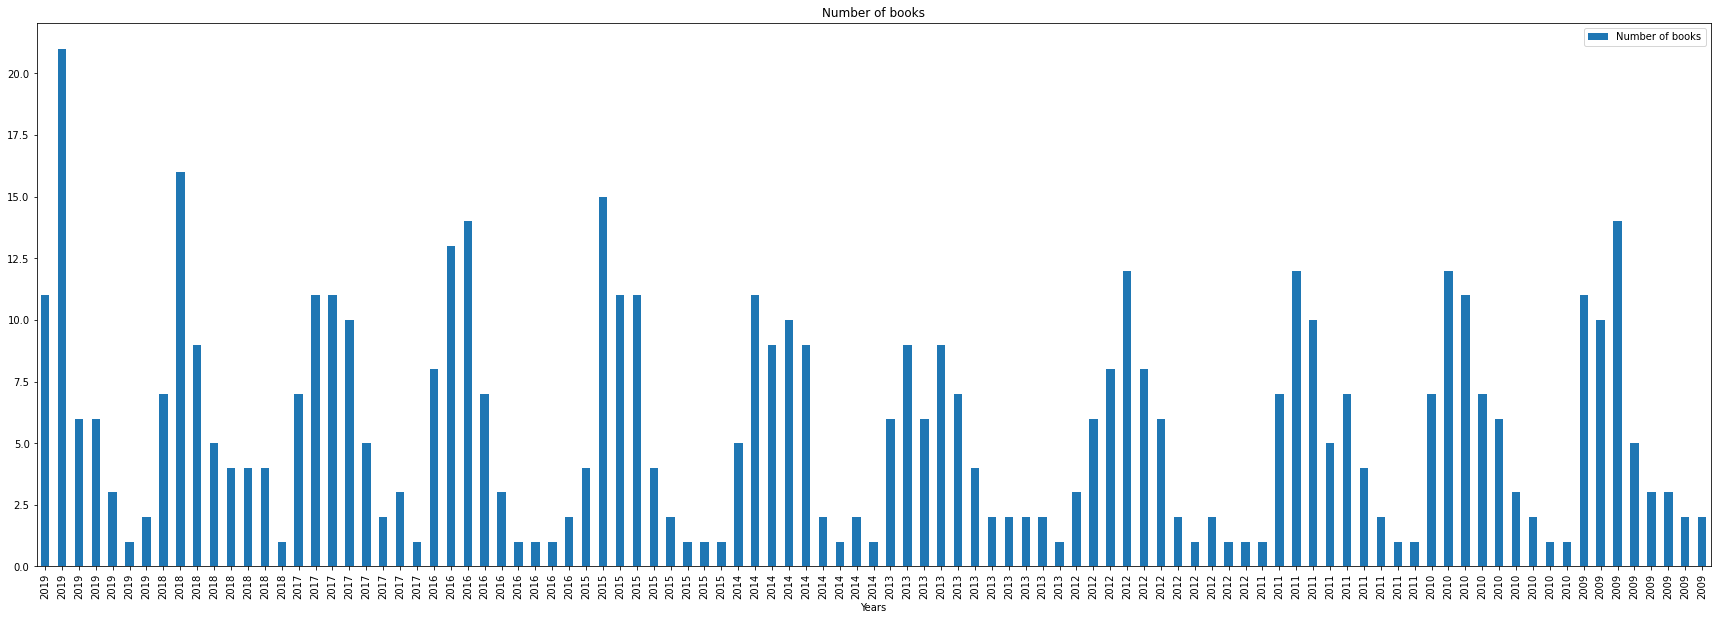

In [180]:
df_rating.plot(x='User Rating', y='Number of books', kind='bar', subplots = True,figsize=(30,10))
df_rating.plot(x='Years', y='Number of books', kind='bar', subplots = True,figsize=(30,10))

Здесь данные уже интереснее: можно заметить что в 2019 году с огромным отрывом лидируют книги с рейтингом 4.8, а в 2012 году график распределения ретйингов практически идеально подходит под график нормального распределения.

Теперь посомтрим как средний рейтинг книг менялся с течением времени:

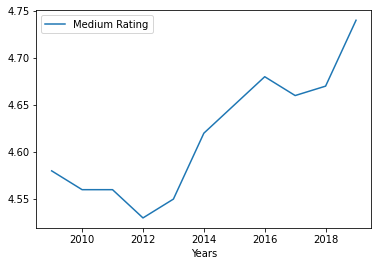

In [225]:
med_list=[]
for j in range(9,20):
  x=df_rating[df_rating['Years'] == (2000+j)]
  u_r=x['User Rating'].to_list()
  n_b = x['Number of books'].to_list()
  sum = 0
  sum_n = 0
  for i in range(len(x)):
    sum += u_r[i]*n_b[i]
    sum_n += n_b[i]
  med_list.append(round(sum/sum_n,2))
df_med = pd.DataFrame.from_dict(data={'Years':range(2009,2020),'Medium Rating': med_list})
df_med.plot(x='Years', y='Medium Rating')



Тут уже можно сделать несколько выводов:

1.   В 2012 году средний рейтинг книг вошедших в топ был минимальным
2.   В 2019 году средний рейтинг книг вошедших в топ стал максимальным
3.   По графику можно понять, что средний рейтинг увеличивается в последнее время



Теперь проанализируем книги по числу рецензий на них, это тоже может считаться метрикой успеха и популярности книги. Для начала выведем топ 10 книг с самым большим числом рецензий:

In [216]:
d2 = {'Book':df['Name'], 'Author': df['Author'], 'Reviews': df['Reviews'] }
df_review = pd.DataFrame.from_dict(d2)
df_review = df_review.sort_values(by='Reviews', ascending=False)
df_review = df_review.drop_duplicates()[:10]
df_review

,Book,Author,Reviews
534,Where the Crawdads Sing,Delia Owens,87841
382,The Girl on the Train,Paula Hawkins,79446
32,Becoming,Michelle Obama,61133
137,Gone Girl,Gillian Flynn,57271
368,The Fault in Our Stars,John Green,50482
437,The Nightingale: A Novel,Kristin Hannah,49288
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,47265
433,The Martian,Andy Weir,39459
20,All the Light We Cannot See,Anthony Doerr,36348
338,The Alchemist,Paulo Coelho,35799


Теперь посроим столбчатую диаграмму числа рецензий в каждом году:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38328dd50>],
      dtype=object)

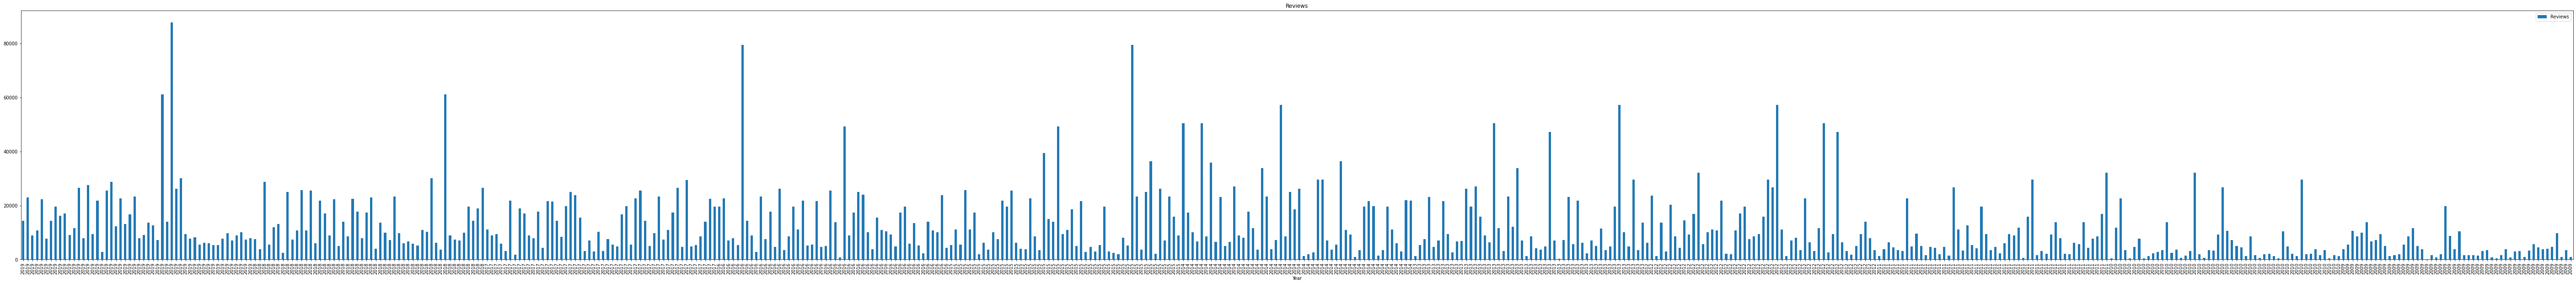

In [224]:
d2 = {'Reviews': df['Reviews'], "Year": df['Year']}
df_review = pd.DataFrame.from_dict(d2)
df_review = df_review.sort_values(by='Year', ascending=False)
df_review.plot(x='Year', y='Reviews', kind = 'bar', subplots = True, figsize=(100,10))

На диаграмме отчетливо видно, что чем позже в списке книга, тем больше на нее рецензий, однако, чтобы убедится лучше построить график изменения среднего числа рецензий с течением времени:

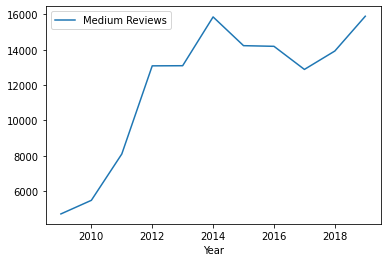

In [228]:
med_list=[]
for j in range(9,20):
  x=df_review[df_review['Year'] == (2000+j)]
  u_r=x['Reviews'].to_list()
  sum = 0
  sum_n = 0
  for i in range(len(x)):
    sum += u_r[i]
    sum_n += 1
  med_list.append(round(sum/sum_n,2))
df_med = pd.DataFrame.from_dict(data={'Year':range(2009,2020),'Medium Reviews': med_list})
df_med.plot(x='Year', y='Medium Reviews')

Здесь мы можем видеть, что проверка была не зря: в самом деле, минимальное чисо рецензий было в 2009 году, однако максимальное было в 2014 и в 2019 году. Посмотрим какие книги в эти года повлияли на такой резкий скачок:

In [234]:
d2 = {'Book':df['Name'], 'Author': df['Author'], 'Reviews': df['Reviews'], 'Year': df['Year']}
df_review = pd.DataFrame.from_dict(d2)
df_review = df_review.sort_values(by='Year', ascending=False)
print(df_review[df_review['Year']==2014][:3], '\n')
print(df_review[df_review['Year']==2019][:3])

                         Book         Author  Reviews  Year
367    The Fault in Our Stars     John Green    50482  2014
110           First 100 Words   Roger Priddy    17323  2014
434  The Maze Runner (Book 1)  James Dashner    10101  2014 

                                                  Book  ...  Year
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  2019
294  School Zone - Big Preschool Workbook - Ages 4 ...  ...  2019
489                   The Wonderful Things You Will Be  ...  2019

[3 rows x 4 columns]


Интересно заметить, что в 2014 году вышли две суперуспешные художественные книги, на которые очевидно будет много рецензий, а вот в 2019 году в топе по отзывам мотивационная книга и две детских.

Вывод